Link to Data: https://archive.ics.uci.edu/ml/datasets/WESAD+%28Wearable+Stress+and+Affect+Detection%29

# Machine Learning
In this program, I follow the basic steps to completing a machine learning project on the WESAD data to determine if it is possible to notice a difference between someone who is very stress, or very amused. I use sklearn to accomplish the machine learning. 

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import roc_curve, confusion_matrix, precision_score, recall_score, f1_score
from scipy.stats import randint as sp_randint
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
#import tensorflow as tf

## Intial Preperation
Before I can split the data into train and test sets, I needed to read in the data and remove some of the not as important lines (NaN data) and columns (start times, unnamed columns, subject etc.) Once the data only had interesting columns and rows, we looked at a describtion of the data and noticed some variablity in the differences in means. So after we split the data into train and test sets, we preformed a standarized scaler.

In [24]:
df = pd.read_csv('alldata.csv')
df.dropna(how='all',inplace=True)
dfmeans = df.mean(axis=0)
df.replace(np.nan,dfmeans,inplace=True)

In [25]:
df = df.drop(['endEDA','startEDA','amuse',
              'labelEDA','labelEDAwrist','endEDAwrist',
              'startEDAwrist','labelEDA','labelEDAwrist','Unnamed: 0','subject'],axis=1)
df.describe()

,meanHrECG,medianHrECG,stdHrECG,varHrECG,meanHrvECG,medianHrvECG,stdHrvECG,varHrvECG,rmssdECG,sdnnECG,...,maxEMG,minEMG,rangeEMG,slopeEMG,meanEMG.1,standard_deviationEMG.1,maxEMG.1,minEMG.1,rangeEMG.1,slopeEMG.1
count,61967.000000,61967.000000,61967.000000,61967.000000,61967.000000,61967.000000,61967.000000,61967.000000,61967.000000,61967.000000,...,61967.000000,61967.000000,61967.000000,6.196700e+04,61967.000000,61967.000000,61967.000000,61967.000000,61967.000000,6.196700e+04
mean,89.026910,89.140086,7.770233,72.198734,715.590683,709.937213,68.066695,5850.622679,50.795323,68.725053,...,0.078712,-0.093777,0.172488,-3.217047e-09,-0.002932,0.014236,0.126293,-0.132217,0.258509,1.200035e-09
std,20.491811,21.164442,3.438373,76.888981,157.587127,161.326563,34.893657,6037.382592,44.263938,35.117294,...,0.050872,0.055850,0.104647,2.739441e-07,0.001412,0.007998,0.115837,0.144272,0.240302,5.878626e-07
min,46.296813,46.296813,0.000000,0.000000,402.749511,398.571429,0.000000,0.000000,1.428571,1.010153,...,0.022659,-0.338058,0.066605,-6.280000e-06,-0.006313,0.007209,0.023758,-1.500000,0.065598,-3.600000e-05
25%,75.712579,75.134409,5.434085,29.529280,602.681314,594.285714,44.265014,1959.391507,19.611366,44.705586,...,0.043613,-0.097154,0.100388,-6.650000e-08,-0.003594,0.010228,0.061393,-0.144882,0.133118,-2.440000e-07
50%,84.265266,84.337349,7.087726,50.235863,718.710801,711.428571,62.911656,3957.876464,38.881723,63.448132,...,0.061393,-0.074158,0.132169,-1.470000e-09,-0.003082,0.012178,0.089584,-0.101486,0.198532,-1.470000e-09
75%,100.403899,100.961539,9.269878,85.930645,801.819961,798.571429,85.403348,7293.731832,63.415978,86.202438,...,0.100296,-0.057907,0.201004,6.100000e-08,-0.002668,0.015758,0.155273,-0.070475,0.294754,2.470000e-07
max,149.121673,150.537634,30.646925,939.233994,1297.857143,1297.857143,343.922180,118282.465600,551.840150,371.478411,...,0.265915,-0.040192,0.574951,4.600000e-06,0.002455,0.082655,1.047180,-0.040970,2.547180,3.520000e-05


In [26]:
df.columns

Index(['meanHrECG', 'medianHrECG', 'stdHrECG', 'varHrECG', 'meanHrvECG',
       'medianHrvECG', 'stdHrvECG', 'varHrvECG', 'rmssdECG', 'sdnnECG',
       'nn50ECG', 'pnn50ECG', 'mrriECG', 'mhrECG', 'meanEDA', 'stdEDA',
       'rangeEDA', 'maxEDA', 'minEDA', 'slopeEDA', 'meanEDAwrist',
       'stdEDAwrist', 'rangeEDAwrist', 'maxEDAwrist', 'minEDAwrist',
       'slopeEDAwrist', 'stress', 'meanResp', 'standard_deviationResp',
       'maxResp', 'minResp', 'rangeResp', 'slopeResp', 'breath_rateResp',
       'in_ex_ratioResp', 'in_meanResp', 'in_stdResp', 'ex_meanResp',
       'ex_stdResp', 'meanResp.1', 'standard_deviationResp.1', 'maxResp.1',
       'minResp.1', 'rangeResp.1', 'slopeResp.1', 'breath_rateResp.1',
       'in_ex_ratioResp.1', 'in_meanResp.1', 'in_stdResp.1', 'ex_meanResp.1',
       'ex_stdResp.1', 'meanTemp', 'standard_deviationTemp', 'maxTemp',
       'minTemp', 'rangeTemp', 'slopeTemp', 'meanEMG', 'standard_deviationEMG',
       'maxEMG', 'minEMG', 'rangeEMG', 'slopeEMG', 'me

In [27]:
X=df.drop(['stress'],axis=1)
Y=df['stress']
X, XTest, Y, YTest = train_test_split(X,Y, train_size = 0.8,random_state=420)

## Standard Scaler
In these three lines of code, I transform the training set parameters into a normalized standard data. What this means is that all data are changed into where they would be if the data was in a normal distrubition graph (with 1 being 1 standard deviation away from the mean, 2 being 2 std away and so on). I also do this for the test set parameters

In [28]:
standard = StandardScaler()
xStand = standard.fit_transform(X)
xTestStand = standard.transform(XTest)

## Demention Reduction
With so many different features that we extracted from the raw data, we needed to find the few that where really nessesary to better generalize to the final test set. This will allow new data (potenital not from this study however we didn't look into that) to have a better chance of correctly being identified. Mainly just not overfitting the data. We used PCA to find where the correct number of attubites would be and found that 28 attubiutes correctly explained about 95% of the variation in the data so we went with keeping those 28. The 28 attubites' explained variation is also given. 

28


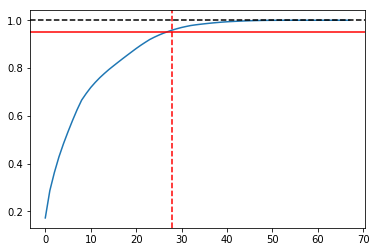

In [29]:
pca = PCA()
pca.fit(xStand)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)
plt.plot(cumsum)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axhline(y=1, color='black', linestyle='--')
plt.axvline(x=d,color='r',linestyle="--")
plt.show()

In [30]:
pca = PCA(n_components=d)
XDim = pca.fit_transform(xStand)
XTestDim = pca.transform(xTestStand)
pca.explained_variance_ratio_

array([0.17305864, 0.11419787, 0.07572288, 0.06511276, 0.05517322,
       0.05014901, 0.04750093, 0.04471977, 0.04019645, 0.02763329,
       0.02512391, 0.02148717, 0.01965797, 0.01749623, 0.016579  ,
       0.01522622, 0.01496167, 0.0147875 , 0.01447514, 0.01426878,
       0.01417511, 0.01337925, 0.01243999, 0.01200354, 0.00960948,
       0.00872842, 0.00785272, 0.00694008])

## Preforming Machine Learning
Here we selected 6 different algorithums. These algorithums are suitible for this project because we are trying to classifier if a time frame is during a stress point or an amused point. And all 6 of these algorithums are normally used in classification. In the end, we choose Random Forest Classifier because of it's low root mean square error compared to the others. 
We also ran the f-score, perision, and recall predictions on each model and Random Forest classifier still performed the best with a very high .999 or higher on all three. Along with an accuracy of also .999 
Finally, we made a confusion matrix of the training set's Random Forest Classifier and found that it only missed 29 times out of the 49,573 total rows

In [31]:
lr = LogisticRegression(solver = 'liblinear')
sgd = SGDClassifier()
svc = LinearSVC()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()
vote = VotingClassifier([('lr', lr), ('rf', rfc), ('svc', svc),('knc',knc),('sgd',sgd)],voting='hard')
#listOfModels = [lr,sgd,svc,knc,rfc,vote]

In [32]:
def testModel(model,X,Y):
    model.fit(X,Y)
    scores = cross_val_score(model,X, Y,scoring='neg_mean_squared_error',cv=10)
    rmse_scores = np.sqrt(-scores)
    print ("mean: %s std: %s" % (rmse_scores.mean(),rmse_scores.std()))
for i in listOfModels:
    testModel(i,XDim,Y)

mean: 0.2664490732891017 std: 0.0056103767798242185
mean: 0.30497104792018404 std: 0.005212464388369008
mean: 0.26602436740065155 std: 0.0059756549509440956
mean: 0.06841179452671804 std: 0.007766091400544526


/usr/local/share/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean: 0.017473524780848713 std: 0.008829730606143234
mean: 0.23730011437080784 std: 0.008368155387873246


In [33]:
def testModel(model,X,Y):
    model.fit(X,Y)
    yPred = cross_val_predict(model, X, Y,cv=10)
    print('ngram: %s Persision: %s Recall: %s f-score: %s' %(model, precision_score(Y,yPred),recall_score(Y,yPred),f1_score(Y,yPred)))
for i in listOfModels:
    testModel(i,XDim,Y)

ngram: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) Persision: 0.9997174520453332 Recall: 0.9994036970781157 f-score: 0.9995605499403605


In [16]:
rfc.fit(XDim,Y)
scores = cross_val_score(rfc,XDim,Y,scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)
print('rmse_scores mean is %s and sd is %s'%(rmse_scores.mean(),rmse_scores.std()))

/usr/local/share/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rmse_scores mean is 0.01874077365060986 and sd is 0.01316335259005014


In [35]:
YPred = cross_val_predict(rfc, XDim, Y,cv=10)
print(accuracy_score(Y,YPred))
print(confusion_matrix(Y,YPred))

0.9995562100336877
[[17706     4]
 [   18 31845]]


## Running on Test Set
The final results of the model after being run on the test set are very similar to the training's cross validation predictions. With an Accuracy of .999 and a f-score of .999. 

In [22]:
final_pred = rfc.predict(XTestDim)
final_mse = mean_squared_error(YTest,final_pred)
print(np.sqrt(final_mse))
print ("Accuracy: %s" % (accuracy_score(YTest, final_pred)))
print(confusion_matrix(YTest,final_pred))
print(f1_score(YTest,final_pred))

0.02376529853026663
Accuracy: 0.9994352105857673
[[4481    2]
 [   5 7906]]
0.9995574941526013


## Significant Findings
What this means is that a machine can almost perfectly predict whither or not someone is stressed or amused. However, this does not predict other emotions. 
So the significant findings of the machine learning part of the project are that there is a significant difference in body conditions between stress and amusement. Does this result mean a machine can accurately predict somones emotions? Probably not. This model is really only good if we know someone is stressed or amused, just not which one. 
While it isn't an amazing finding, it does start as a stepping stone into machines reading emotions, and how differently our bodies react to different stimuli.  